## **Zomato Sales Analysis Project**

### <b> Importing libraries </b>
* Numpy used for numerical data operations
* Pandas for Data manipulations and Analysis
* Matplotlib.pyplot and seaborn used for data visualizations

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#mounting Gdrive for uploading files into Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ### <b> Create the Data Frame

In [ ]:
dataframe=pd.read_csv(r'/content/drive/MyDrive/Python/Zomato_data.csv')
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### <b> Data Cleaning and Preprocessing

In [ ]:
# Convert the data type of column - rate (rating) from object type to float64
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)

In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurent')

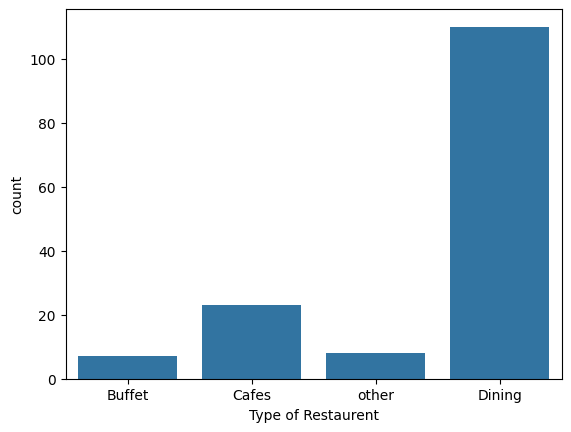

In [ ]:
# Type of restaurents
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurent")

**Conclusions:** Mejority of the customers are comes under restaurnt tyoe is Dining category.

In [ ]:
# Voting from customers

Text(0.5, 0, 'Type of restaurent')

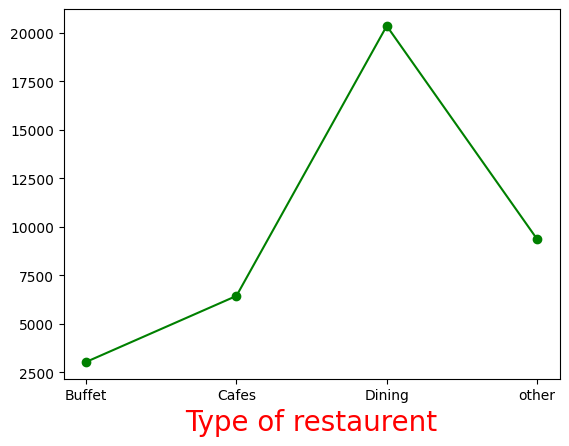

In [ ]:
group_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of restaurent",c='red',size=20)

**Conclusions:** Dining restaurants has recieved more votes

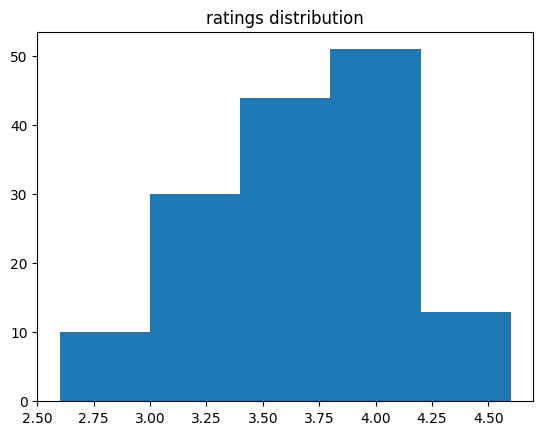

In [ ]:
# rating distribution
plt.hist(dataframe['rate'],bins=5)
plt.title('ratings distribution')
plt.show()

**Conclusions:** The majority restaurants received ratings from the range between <b>3.5 - 4 </b>

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

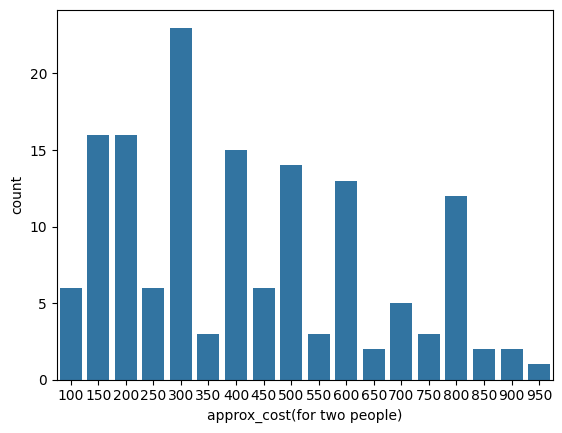

In [ ]:
# Avg Order spending on by couples
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

**Conclusions:** The mejority of couples prefer restaurants with an approximate cost of 300 Rupees.

<Axes: xlabel='online_order', ylabel='rate'>

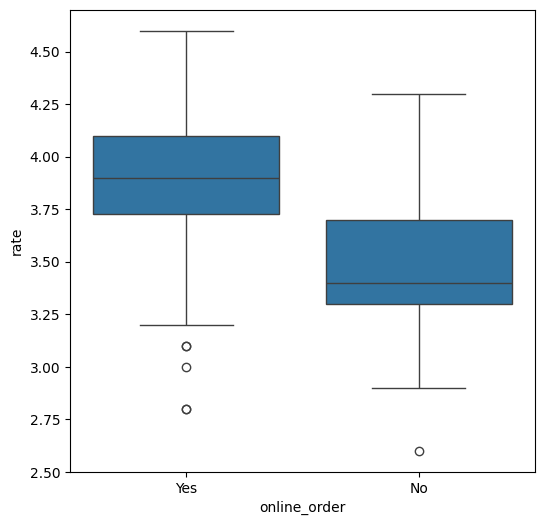

In [ ]:
# Which mode (onile/Offline) has recieved max rating
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

**Conclusions:** Offline orders received  lower rating in compare to order online orders.

In [ ]:
# which type of restaurents recieved more offilne orders, so that zomato can customer

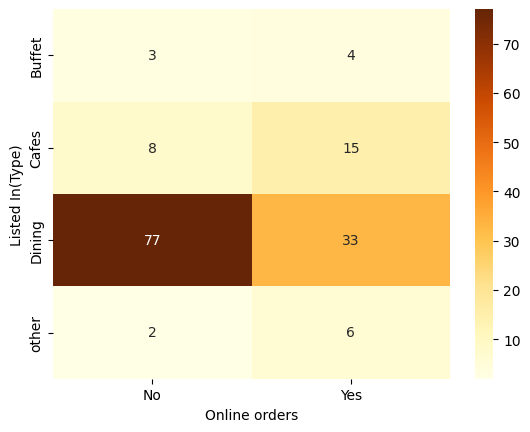

In [ ]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlOrBr',fmt='d')
plt.xlabel("Online orders")
plt.ylabel("Listed In(Type)")
plt.show()

<b>Conclusion:</b> Dining restaurents primarily accept offline orders, whereas cafes primarily recieved online orders,
this suggests that clients prefered orders in personally dining at restaurents but prefer online ordering at cafes.